# What makes a good Math Student?

I grew up in the Philippines where each grade level has 4-7 classrooms with at least 30 students in each class. I always wondered how classrooms were assigned to students. We all know if you are smart, you'll be part of class A or class 1, but how about the rest of the student body? How do they know?

This dataset only scatches the surface of one of my childhood questions and we have to start somewhere. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#jupyter intelisense
%config IPCompleter.greedy=True

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

When looking for a dataset to answer my question, I stumble upon this (https://archive.ics.uci.edu/ml/datasets/Student+Performance) in UCI Machine Learning Repository. One step closer to the answers!

Let's get started!



### DATA EXPLORATION

In the original data it also contains performance for Portuguese language students. For this capstone we will focus of Math students and their performance.

In [2]:
df = pd.read_csv('downloads/student/student-mat.csv', sep = ';')

**Source:**
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

**Data Set Information:**

This data is from two Portuguese school which include student grades, demographic, social and school related features.

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Need to check if thers's any missing data.

In [5]:
df.isnull().sum()*100/df.isnull().count()

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

This is a very clean data. YES! Let's check the rest of the data

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


After checking the statistical information let's also look at the unique values each column offers.

In [7]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column school are: ['GP' 'MS']
Unique values in column sex are: ['F' 'M']
Unique values in column age are: [18 17 15 16 19 22 20 21]
Unique values in column address are: ['U' 'R']
Unique values in column famsize are: ['GT3' 'LE3']
Unique values in column Pstatus are: ['A' 'T']
Unique values in column Medu are: [4 1 3 2 0]
Unique values in column Fedu are: [4 1 2 3 0]
Unique values in column Mjob are: ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in column Fjob are: ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in column reason are: ['course' 'other' 'home' 'reputation']
Unique values in column guardian are: ['mother' 'father' 'other']
Unique values in column traveltime are: [2 1 3 4]
Unique values in column studytime are: [2 3 1 4]
Unique values in column failures are: [0 3 2 1]
Unique values in column schoolsup are: ['yes' 'no']
Unique values in column famsup are: ['no' 'yes']
Unique values in column paid are: ['no' 'yes']
Unique va

First I want to see which school has the most data.

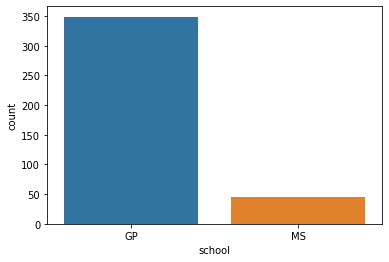

In [8]:
sns.countplot('school', data=df)
plt.show()

Attendance is also important to know.

Text(0.5, 1.0, 'absences')

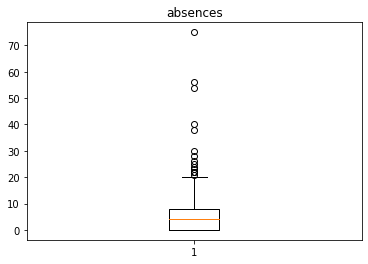

In [9]:
plt.boxplot(df["absences"]) 
plt.title("absences")

I want to make changes on the data so to keep the integrity of the original dataset, I'm creating the copy and only makinf changes the copy version. 

In [10]:
df_copy = df.copy()

In [11]:
def func(row,column):
    if row[column] < 10:
        return 0
    elif row[column] > 9:
        return 1 
    else:
        return 2

df_copy['grade1'] = df_copy.apply(func, column='G1', axis=1)
df_copy['grade2'] = df_copy.apply(func, column='G2', axis=1)
df_copy['grade3'] = df_copy.apply(func, column='G3', axis=1)


def func2(row,column):
    if row[column] == 'no':
        return 0
    elif row[column] == 'yes':
        return 1 
    else:
        return 2

df_copy['school_sup'] = df_copy.apply(func2, column='schoolsup', axis=1)
df_copy['fam_sup'] = df_copy.apply(func2, column='famsup', axis=1)
df_copy['paid_'] = df_copy.apply(func2, column='paid', axis=1)
df_copy['activities_'] = df_copy.apply(func2, column='activities', axis=1)
df_copy['nursery_'] = df_copy.apply(func2, column='nursery', axis=1)
df_copy['higher_'] = df_copy.apply(func2, column='higher', axis=1)
df_copy['internet_'] = df_copy.apply(func2, column='internet', axis=1)
df_copy['romantic_'] = df_copy.apply(func2, column='romantic', axis=1)


def func3(row,column):
    if row[column] == 'at_home':
        return 0
    else:
        return 1

df_copy['M_job'] = df_copy.apply(func3, column='Mjob', axis=1)
df_copy['F_job'] = df_copy.apply(func3, column='Fjob', axis=1)

In [12]:
df_copy=df_copy.drop(['G1', 'G2','G3','schoolsup','famsup','paid','activities','nursery','higher','internet',
             'romantic','Mjob','Fjob'], axis=1)

In [13]:
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,grade1,grade2,grade3,school_sup,fam_sup,paid_,activities_,nursery_,higher_,internet_,romantic_,M_job,F_job
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,4,3,4,1,1,3,6,0,0,0,1,0,0,0,1,1,0,0,0,1
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,5,3,3,1,1,3,4,0,0,0,0,1,0,0,0,1,1,0,0,1
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,3,4,3,2,2,3,3,10,0,0,1,1,0,1,0,1,1,1,0,0,1
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,3,2,2,1,1,5,2,1,1,1,0,1,1,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,4,3,2,1,2,5,4,0,1,1,0,1,1,0,1,1,0,0,1,1


In [14]:
df_copy['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

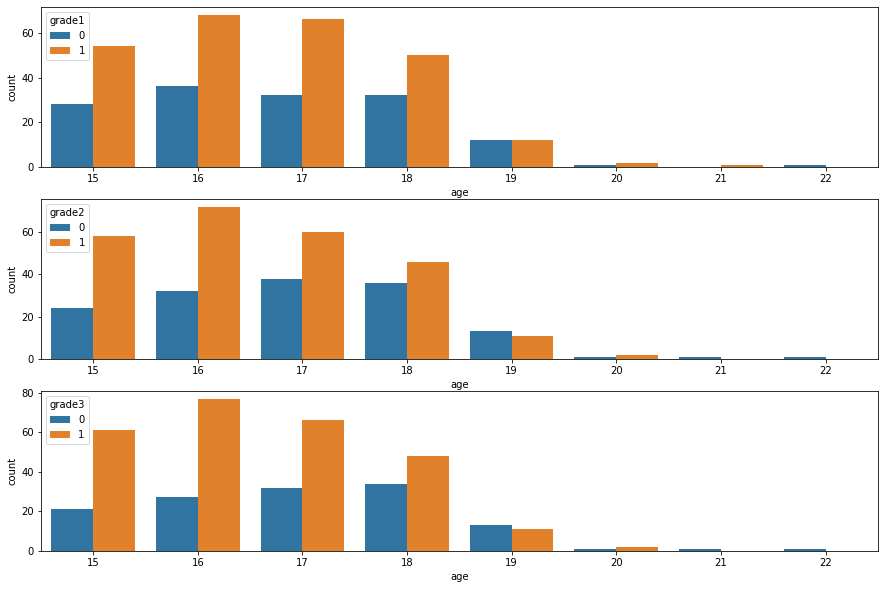

In [15]:
fig, ax = plt.subplots(3,1, figsize=(15,10))

g1 = sns.countplot(x="age", hue="grade1", data=df_copy, ax=ax[0])
g2 = sns.countplot(x="age", hue="grade2", data=df_copy, ax=ax[1])
g3 = sns.countplot(x="age", hue="grade3", data=df_copy, ax=ax[2])

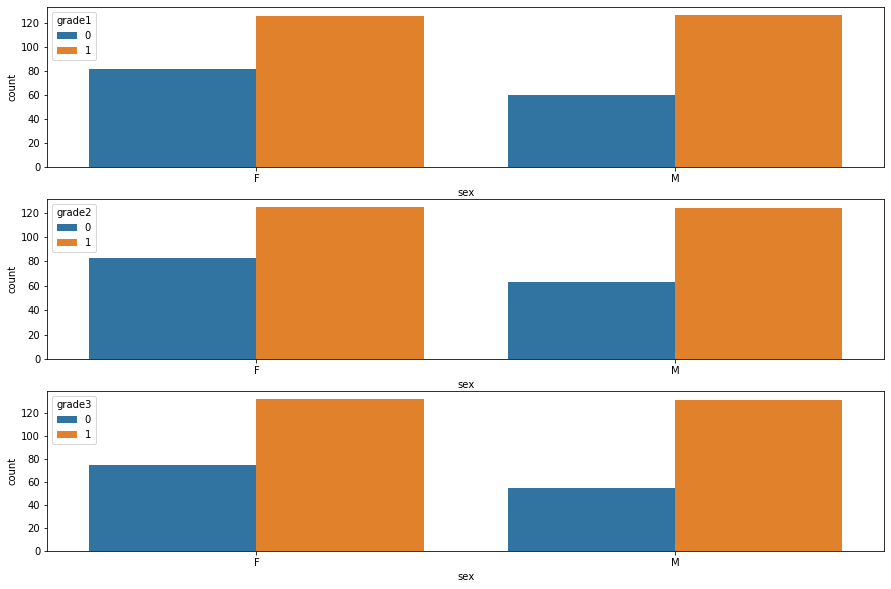

In [16]:
fig, ax = plt.subplots(3,1, figsize=(15,10))

g1 = sns.countplot(x="sex", hue="grade1", data=df_copy, ax=ax[0])
g2 = sns.countplot(x="sex", hue="grade2", data=df_copy, ax=ax[1])
g3 = sns.countplot(x="sex", hue="grade3", data=df_copy, ax=ax[2])

In [17]:
df_absent = df[['absences', 'sex', 'age','G3']].copy()

In [18]:
def func4(row):
    if row['absences'] < 11:
        return 'less than 11 days'
    elif row['absences'] == 11 & row['absences'] < 21:
        return 'between 11 - 20 days' 
    elif row['absences'] == 21 & row['absences'] < 31:
        return 'between 21 - 30 days' 
    else:
        return 'more than 30 days'

df_absent['abs'] = df_absent.apply(func4, axis=1)

In [19]:
g = sns.countplot(x="abs", data=df_absent, ax=ax[0])

In [20]:
df_absent.tail()

,absences,sex,age,G3,abs
390,11,M,20,9,between 11 - 20 days
391,3,M,17,16,less than 11 days
392,3,M,21,7,less than 11 days
393,0,M,18,10,less than 11 days
394,5,M,19,9,less than 11 days


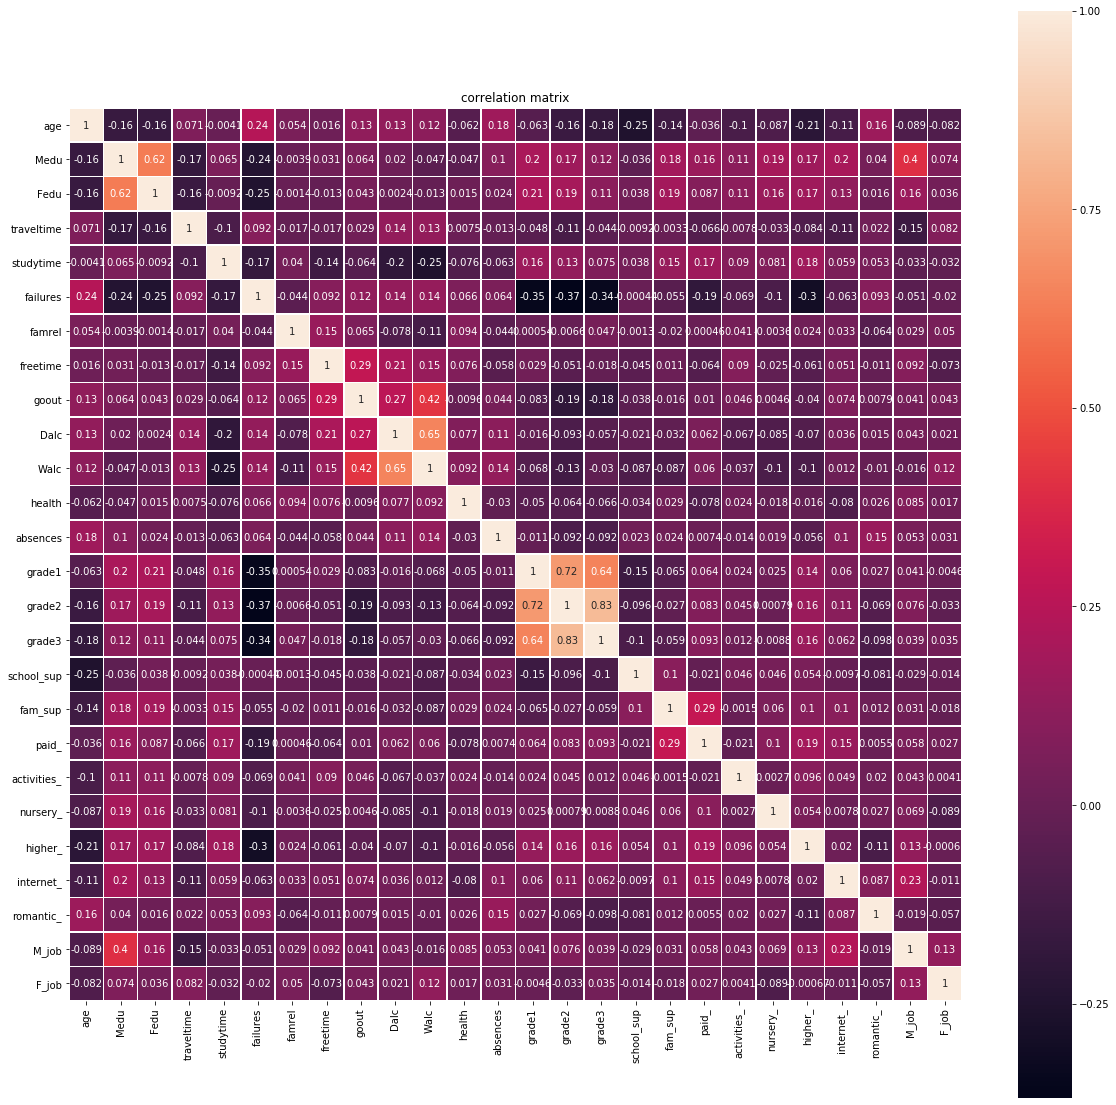

In [21]:
# make the correlation matrices.
df_cmat = df_copy.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(df_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

### TRAINING

In [22]:
import statsmodels.api as sm

# Y is the target variable
y = df_copy['grade3']
# X is the feature set
X = df_copy[['grade1','grade2','age','goout','school_sup','higher_','paid_','failures','Medu','Fedu','absences']]

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 424
The number of observations in test set is 106


### BUILDING A MODEL

### Model 1: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

0.9339622641509434

### Model 2: Ordinary Least Square Regression

In [26]:
results = sm.OLS(y_sm, X_sm).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              379.6
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                   5.45e-240
Time:                        11:59:49   Log-Likelihood:                          15.262
No. Observations:                 530   AIC:                                     -8.525
Df Residuals:                     519   BIC:                                      38.48
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1374      0.033      4.114      0.000       0.072       0.203
x2             0.7719      0.034     23.023      0.000       0.706       0.838
x3             0.0030      0.003      0.968      0.333      -0.003       0.009
x4            -0.0044      0.010     -0.436      0.663      -0.024       0.015
x5            -0.0035      0.032     -0.108      0.914      -0.067       0.060
x6             0.0590      0.040      1.459      0.145      -0.020       0.139
x7             0.0325      0.022      1.451      0.147      -0.011       0.076
x8             0.0065      0.016      0.418      0.676      -0.024       0.037
x9             0.0061      0.012      0.492      0.623      -0.018       0.031
x10           -0.0209      0.013     -1.651      0.099      -0.046       0.004
x11           -0.0008      0.001     -0.602      0.548      -0.003       0.002
==============================================================================
Omnibus:                      210.550   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2397.892
Skew:                           1.406   Prob(JB):                         0.00
Kurtosis:                      13.034   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3: Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

# This is the model with linear feature
lrm_underfit = LinearRegression().fit(X, y)
preds_underfit = lrm_underfit.predict(X)

# This is the model with quadratic feature
X_correct = pd.concat([X, X**2], axis=1)
lrm_correct = LinearRegression().fit(X_correct, y)
preds_correct = lrm_correct.predict(X_correct)

# This is the model with up to 10th order polynomial of the feature
X_overfit = pd.concat([X**i for i in range(1,11)], axis=1)
lrm_overfit = LinearRegression().fit(X_overfit, y)
preds_overfit = lrm_overfit.predict(X_overfit)

In [28]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Lasso

np.seterr(divide='ignore', invalid='ignore')

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format
      (lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.07033575148809557
Mean absolute error of the prediction is: 0.5053844784620861
Mean squared error of the prediction is: 0.25605753826984695
Root mean squared error of the prediction is: 0.506021282427772
Mean absolute percentage error of the prediction is: inf


In [29]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format
      (ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.07033575148809557
Mean absolute error of the prediction is: 0.5053844784620861
Mean squared error of the prediction is: 0.25605753826984695
Root mean squared error of the prediction is: 0.506021282427772
Mean absolute percentage error of the prediction is: inf


In [30]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format
      (elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format
      (elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.07033575148809557
Mean absolute error of the prediction is: 0.5053844784620861
Mean squared error of the prediction is: 0.25605753826984695
Root mean squared error of the prediction is: 0.506021282427772
Mean absolute percentage error of the prediction is: inf


In [31]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format
      (lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format
      (rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.7742874979189183
-----Test set statistics-----
R-squared of the model in test set is: 0.7695370371042466
Mean absolute error of the prediction is: 0.13080937088772673
Mean squared error of the prediction is: 0.05513389500389686
Root mean squared error of the prediction is: 0.23480607957183916
Mean absolute percentage error of the prediction is: inf


In [32]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format
      (ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.7801464137273634
-----Test set statistics-----
R-squared of the model in test set is: 0.7581551091236207
Mean absolute error of the prediction is: 0.12330309721230577
Mean squared error of the prediction is: 0.057856805506915916
Root mean squared error of the prediction is: 0.24053441647073276
Mean absolute percentage error of the prediction is: inf


In [33]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format
      (elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format
      (elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format
      (np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.776951635442149
-----Test set statistics-----
R-squared of the model in test set is: 0.7643201545138906
Mean absolute error of the prediction is: 0.1305572646220259
Mean squared error of the prediction is: 0.056381935267591846
Root mean squared error of the prediction is: 0.23744880557204714
Mean absolute percentage error of the prediction is: inf


### Summary

WHY YOU CHOSE IT?

I was looking to predict the score in the last math period, and understand how this data is related to other independent data. I looked into regression analysis. The first model I wanted to try is the Logistic Regression Model. I wanted to try another model to confirm my initial analysis, so I tried the Linear Model.


WHY IT WORKS?

This model works for a regression analysis by predicting an outcome based on a historical data. Regression analysis is used to predict the behavior of a dependent variable(student grades) based on the behavior of various independent variables(age, educational background, aspirations in life).

HOW IT WILL RUN IN A PRODUCTION LIKE ENVIRONMENT

Though I am trying to determine what factors makes a math genius, this can also be applied to helping students in other difficult subjects, such as science. If we know these factors, then we would plead a case to our educational board members on how to better allocate funds. This data will help us decide what is most important to help produce better quality students.

WHAT WOULD YOU NEED TO DO TO MAINTAIN IT GOING FORWARD?

In this data, we used the certain data features (prior period grades, their ages, if they go out often, if they have aspirations to finish school, past failures, parent's education and how many times they were present in class) as determining factors for getting good math grades. If we could anaylze the rest of the data points from the original data set we would have an even stronger argument to our deciding leaders.

Showing this data to the right people in the education field, and maybe have social media involved, would spark a movement that better education leads to better economy and helps cultivate a better country. I know this is a tall order to ask, but if I could convince one person with the data presented which then will inpire another person, this domino effect, this positive domino effect, will produce a thirst for knowledge and the truth on how the world works.

**Relevant Papers:**

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.



**Citation Request:**

Please include this citation if you plan to use this database:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.